In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('Table 2.csv')

data['merged'] = (data['CISM'] + data['CFPQ']) / 2
data['merged'] = data['merged'].astype(int)

data.to_csv('Table 2.csv', index=False)

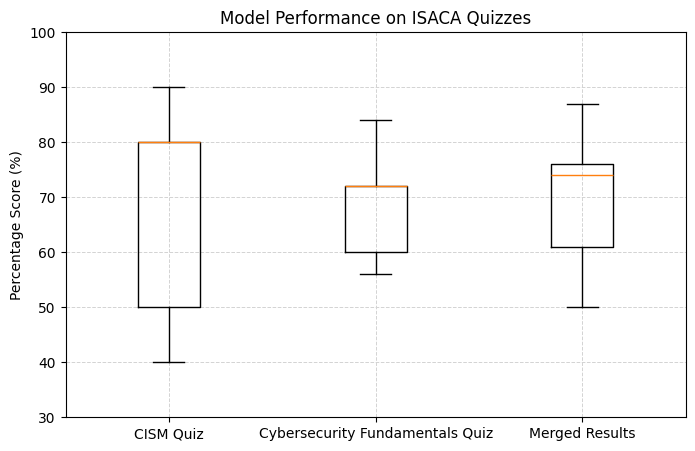

In [18]:
data = pd.read_csv('Table 2.csv')

boxplot_data = [data['CISM'], data['CFPQ'], data['merged']]

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

for i in range(1, len(boxplot_data) + 1):
    ax.axvline(x=i, color='lightgrey', linestyle='--', linewidth=0.7)

for y in range(40, 101, 10):
    ax.axhline(y=y, color='lightgrey', linestyle='--', linewidth=0.7)

ax.boxplot(boxplot_data, showmeans=False)  # Remove the mean triangle

ax.set_xticklabels(['CISM Quiz', 'Cybersecurity Fundamentals Quiz','Merged Results'])
ax.set_ylabel('Percentage Score (%)')
ax.set_title('Model Performance on ISACA Quizzes')

# Set Y-axis limits
ax.set_ylim([30, 100])

plt.show()

In [ ]:
# Function to calculate the scores
def calculate_scores(table):
    models = table.columns[1:-1]
    scores = {}
    for model in models:
        correct_answers = table[model] == table['Answers']
        scores[model] = correct_answers.mean() * 100
    return scores

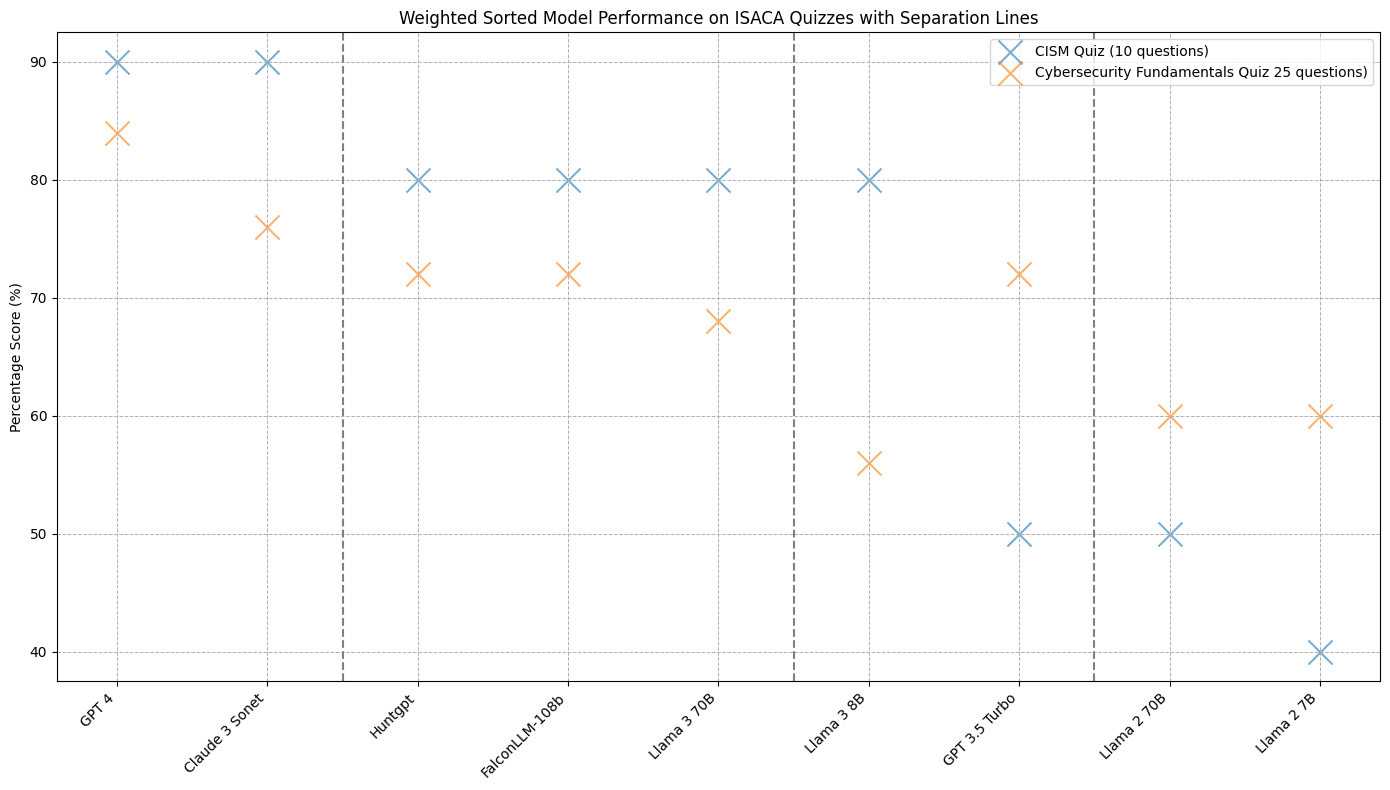

In [38]:
sorted_data = pd.read_csv('Table 2.csv').sort_values('merged', ascending=False)

plt.figure(figsize=(14, 8))
for quiz in ['CISM', 'CFPQ']:
    plt.scatter(sorted_data['Models'], sorted_data[quiz], s=300, alpha=0.6, label=quiz, marker="x")

# separation lines
for index in [2,5, 7]:
    plt.axvline(x=index - 0.5, color='gray', linestyle='--')

plt.xticks(rotation=45, ha="right")
plt.ylabel('Percentage Score (%)')
plt.title('Weighted Sorted Model Performance on ISACA Quizzes with Separation Lines')
plt.legend(['CISM Quiz (10 questions)', 'Cybersecurity Fundamentals Quiz 25 questions)'])
plt.grid(linestyle='--', linewidth=0.7) 
plt.tight_layout()
plt.show()


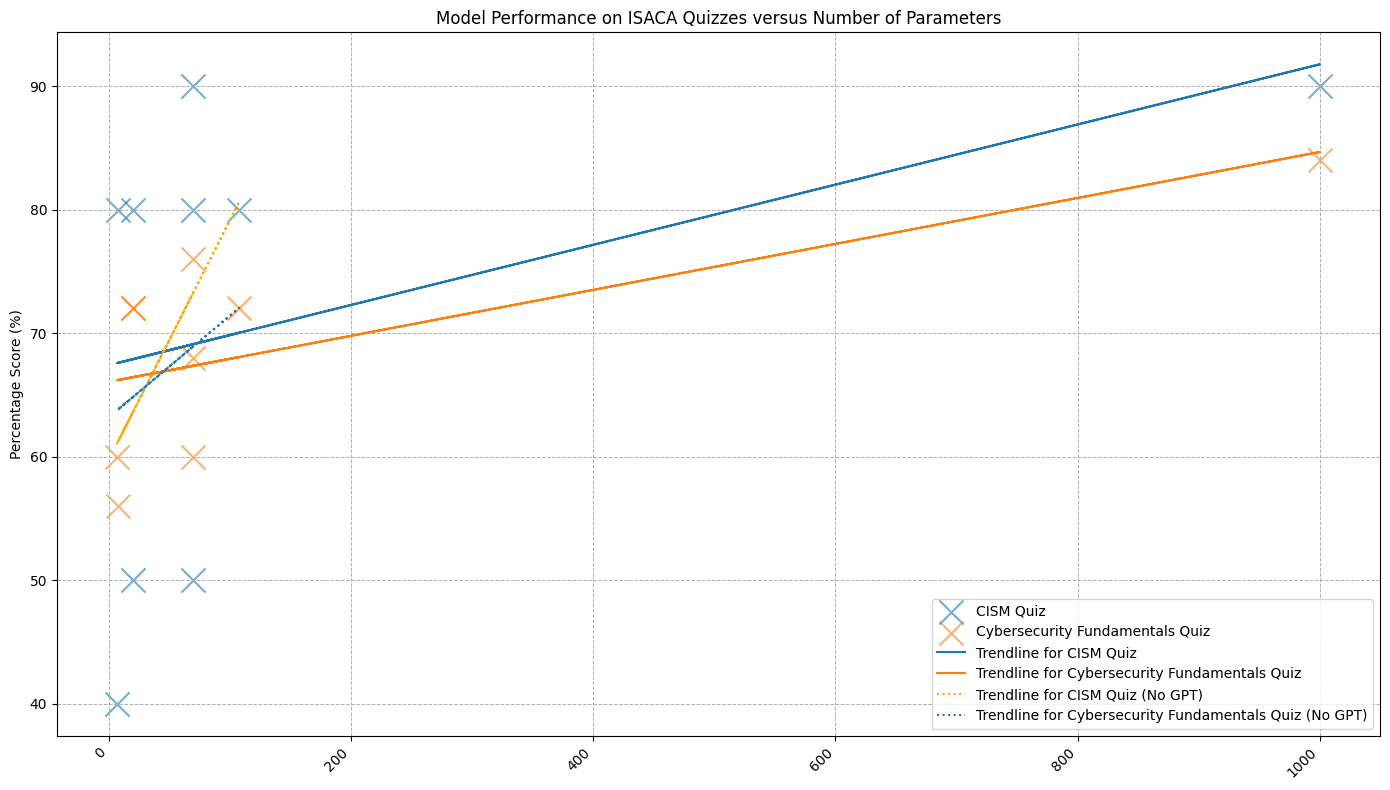

In [94]:
data = pd.read_csv('Table 2.csv')

plt.figure(figsize=(14, 8))
for quiz in ['CISM', 'CFPQ']:
    plt.scatter(data['params(B)'], data[quiz], s=300, alpha=0.6, label=quiz, marker="x")

# trendlines with gpt-4
trend_cism = np.poly1d(np.polyfit(data['params(B)'], data['CISM'], 1))
trend_cfpq = np.poly1d(np.polyfit(data['params(B)'], data['CFPQ'], 1))
plt.plot(data['params(B)'], trend_cism(data['params(B)']))
plt.plot(data['params(B)'], trend_cfpq(data['params(B)']))

# trendlines without gpt-4
no_gpt = data[data['Models'] != 'GPT 4']
trend_cism_no_gpt = np.poly1d(np.polyfit(no_gpt['params(B)'], no_gpt['CISM'], 1))
trend_cfpq_no_gpt = np.poly1d(np.polyfit(no_gpt['params(B)'], no_gpt['CFPQ'], 1))
plt.plot(no_gpt['params(B)'], trend_cism_no_gpt(no_gpt['params(B)']), color='orange', linestyle=':')
plt.plot(no_gpt['params(B)'], trend_cfpq_no_gpt(no_gpt['params(B)']), color='#2278b4', linestyle=':')


plt.xticks(rotation=45, ha="right")
plt.ylabel('Percentage Score (%)')
plt.title('Model Performance on ISACA Quizzes versus Number of Parameters')

plt.legend(['CISM Quiz', 'Cybersecurity Fundamentals Quiz', 'Trendline for CISM Quiz', 'Trendline for Cybersecurity Fundamentals Quiz', 'Trendline for CISM Quiz (No GPT)', 'Trendline for Cybersecurity Fundamentals Quiz (No GPT)'], loc='lower right')


plt.grid(linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()